In [1]:
import time
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [3]:
df  =pd.read_csv('mushrooms.csv')

In [4]:
X = df.drop(['class'], axis = 1)
Y = df['class']
X = pd.get_dummies(X, prefix_sep='_')
Y = LabelEncoder().fit_transform(Y)
X = StandardScaler().fit_transform(X)

In [5]:
def forest_test(X, Y):
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, 
                                                        test_size = 0.30, 
                                                        random_state = 101)
    start = time.process_time()
    trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train,Y_Train)
    print(time.process_time() - start)
    predictionforest = trainedforest.predict(X_Test)
    print(confusion_matrix(Y_Test,predictionforest))
    print(classification_report(Y_Test,predictionforest))

In [6]:
forest_test(X, Y)

2.765625
[[1274    0]
 [   0 1164]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1164

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [7]:

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
PCA_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
PCA_df = pd.concat([PCA_df, df['class']], axis = 1)
PCA_df['class'] = LabelEncoder().fit_transform(PCA_df['class'])
PCA_df.head()

,PC1,PC2,class
0,-3.284608,1.019930,1
1,-3.969431,-0.856960,0
2,-4.958476,-0.211257,0
3,-3.469866,0.337793,1
4,-2.726577,0.889651,0


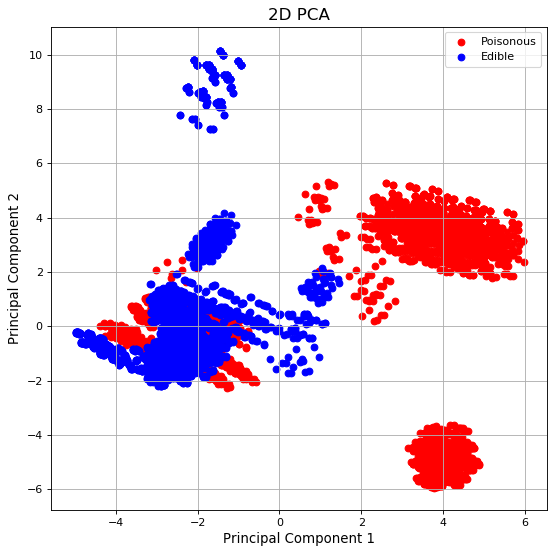

In [8]:
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')

classes = [1, 0]
colors = ['r', 'b']
for clas, color in zip(classes, colors):
    plt.scatter(PCA_df.loc[PCA_df['class'] == clas, 'PC1'], 
                PCA_df.loc[PCA_df['class'] == clas, 'PC2'], 
                c = color)
    
plt.xlabel('Principal Component 1', fontsize = 12)
plt.ylabel('Principal Component 2', fontsize = 12)
plt.title('2D PCA', fontsize = 15)
plt.legend(['Poisonous', 'Edible'])
plt.grid()

In [10]:
pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X)
PCA3_df = pd.DataFrame(data = X_pca3, columns = ['PC1', 'PC2', 'PC3'])
PCA3_df = pd.concat([PCA3_df, df['class']], axis = 1)
PCA3_df['class'] = LabelEncoder().fit_transform(PCA3_df['class'])
PCA3_df.head()

,PC1,PC2,PC3,class
0,-3.284706,1.020124,-1.353743,1
1,-3.969501,-0.856918,0.237599,0
2,-4.958620,-0.211141,0.466590,0
3,-3.469937,0.337953,-1.335130,1
4,-2.726573,0.889646,-2.051863,0


In [14]:
import plotly.express as px
colors = ['r', 'b', 'y']
fig = px.scatter_3d(PCA3_df, x='PC1', y='PC2', z='PC3',
              color='class')
fig.show()

In [16]:
import plotly
plotly.offline.plot(fig, filename='3D_plot.html') 

NameError: name 'offline' is not defined